# K-Nearest Neighbors Digits Classifiers


### Goal

The primary objective of this project is to develop a robust digits classification system utilizing the K-Nearest Neighbors (KNN) model. The classifier aims to accurately identify handwritten digits based on pixel intensity values provided in the dataset. By leveraging the simplicity and effectiveness of KNN, this project seeks to:

- **Understand and implement the KNN algorithm**: Explore its working principles, including distance metrics and the impact of the number of neighbors (k) on classification performance.
- **Evaluate the classifier's performance**: Measure accuracy, precision, recall, and other metrics to assess the effectiveness of the model on training and testing datasets.
- **Optimize and fine-tune hyperparameters**: Experiment with different values of `k` and distance metrics to identify configurations that maximize accuracy.
- **Visualize results and insights**: Present key findings through visualizations, including confusion matrices, performance plots, and classification examples.

This project serves as a practical exploration of supervised machine learning techniques, focusing on real-world applications of image recognition and pattern classification.


## Imports for this project


In [104]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

## Lets load dataset from MNIST dataset.


In [105]:
mnist = sklearn.datasets.fetch_openml("mnist_784")
x = mnist.data.to_numpy(dtype=np.int64)
y = mnist.target.to_numpy(dtype=np.int64)

## Separate training and testing data randomly.


In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x[:2500], y[:2500], test_size=0.2, random_state=123, stratify=y[:2500]
)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2000, 784)
(500, 784)
(2000,)
(500,)


## Using K-Nearest Neighbors (KNN) with scikit-learn

In this code snippet, we perform the following steps:

1. **Initialize the K-Nearest Neighbors (KNN) Classifier**  
   We create a KNN model using scikit-learn, specifying `n_neighbors=5`, which means the algorithm will consider the 5 nearest neighbors for classification.

2. **Train the KNN Model**  
   The model is trained using the training dataset (`X_train` and `Y_train`).

3. **Evaluate the Model**  
   We calculate the accuracy of the model on the test dataset (`X_test` and `Y_test`) using the `score` method.

4. **Output the Accuracy**  
   Finally, we print the model's accuracy score, which measures how well the classifier performed on the test data.


In [107]:
sklearn_knn = KNeighborsClassifier(n_neighbors=5)
sklearn_knn.fit(X_train, Y_train)
sklearn_knn_score = sklearn_knn.score(X_test, Y_test)
print("sklearn_knn_score:", sklearn_knn_score)

sklearn_knn_score: 0.912


## k-Nearest Neighbors (KNN) Class Implementation

Now let's create our own KNN and compare it with sklearn KNN.

This class implements the k-Nearest Neighbors (KNN) algorithm for supervised learning. The class includes methods for training, predicting, and evaluating the model's performance. The distance metric used is the Euclidean (L2) norm.

Euclidean (L2) norm distance formula:
$$
\|\mathbf{x_2} - \mathbf{x_1}\|_2 = \sqrt{\sum_{i=1}^n (x_{2,i} - x_{1,i})^2}
$$

Where $\mathbf{x_1} = [x_{1,1}, x_{1,2}, \ldots, x_{1,n}]$ and $\mathbf{x_2} = [x_{2,1}, x_{2,2}, \ldots, x_{2,n}]$ are vectors in $n$-dimensional space.



### Class and Method Descriptions

#### `class knn`
The `knn` class encapsulates the logic for a KNN model, allowing initialization with a specified number of neighbors (`k`), training on labeled data, and predictions for unseen data.

#### **Attributes**
- `k` (`int`): The number of nearest neighbors to consider.
- `X_train` (`np.ndarray` or `None`): Training feature data.
- `Y_train` (`np.ndarray` or `None`): Training labels.

---

### Methods

#### `__init__(self, k)`
Initializes the KNN model.
- **Parameters:**
  - `k` (`int`): The number of nearest neighbors to consider.

#### `fit(self, X, Y)`
Stores the training data for later use in predictions.
- **Parameters:**
  - `X` (`np.ndarray`): Feature matrix for training data.
  - `Y` (`np.ndarray`): Labels for training data.

#### `distance(self, x1, x2)`
Calculates the Euclidean (L2) distance between two data points.
- **Parameters:**
  - `x1` (`np.ndarray`): The first data point.
  - `x2` (`np.ndarray`): The second data point.
- **Returns:**
  - `float`: The Euclidean distance between `x1` and `x2`.

#### `most_common_number(self, nums)`
Finds the most common number in a list.
- **Parameters:**
  - `nums` (`list` or `np.ndarray`): List of numbers.
- **Returns:**
  - `int`: The most frequently occurring number in the input.

#### `predict(self, x_test)`
Predicts the labels for a set of test examples based on the k nearest neighbors.
- **Parameters:**
  - `x_test` (`np.ndarray`): Feature matrix for test data.
- **Returns:**
  - `np.ndarray`: Predicted labels for the test data.

#### `score(self, x_test, y_test)`
Calculates the accuracy of the model on test data.
- **Parameters:**
  - `x_test` (`np.ndarray`): Feature matrix for test data.
  - `y_test` (`np.ndarray`): True labels for test data.
- **Returns:**
  - `float`: The proportion of correctly predicted labels.

#### `getAccuracy(self, y1, y2)`
Computes the accuracy given two lists of labels.
- **Parameters:**
  - `y1` (`np.ndarray`): Predicted labels.
  - `y2` (`np.ndarray`): True labels.
- **Returns:**
  - `float`: The proportion of matching labels between `y1` and `y2`.

---

### Notes
1. **Distance Metric:** The `distance` method uses the Euclidean (L2) norm to calculate the distance between data points.
2. **Prediction Logic:** The model predicts the label of a test example by finding the `k` nearest training examples and selecting the most common label among them.
3. **Evaluation:** Both `score` and `getAccuracy` methods can be used to evaluate the model's performance, with `score` providing a built-in evaluation pipeline.
4. **Input Assumptions:**
   - Training and test datasets (`X_train`, `x_test`) are numpy arrays of compatible dimensions.
   - Labels (`Y_train`, `y_test`) are integers or categorical values encoded as integers.

---



In [108]:
class knn:
	def __init__(self, k):
		self.k = k
		self.X_train = None
		self.Y_train = None

	def fit(self, X, Y):
		self.X_train = X
		self.Y_train = Y

	def distance(self, x1, x2):
		return np.linalg.norm(x2 - x1)
	
	def most_common_number(self, nums):
		count_dict = {}
		max_count = 0
		most_common_num = None
		
		for num in nums:
			if num in count_dict:
				count_dict[num] += 1
			else:
				count_dict[num] = 1
			
			if count_dict[num] > max_count:
				max_count = count_dict[num]
				most_common_num = num
		
		return most_common_num

	def predict(self, x_test):
		prediction = np.empty(x_test.shape[0])

		for i in range(x_test.shape[0]):
			distances = np.array([self.distance(x_train, x_test[i]) for x_train in self.X_train])

			sorted_dist_index = distances.argsort()[:self.k]
			nearest_labels = self.Y_train[sorted_dist_index]
			prediction[i] = self.most_common_number(nearest_labels)

		return prediction
		
	def score(self, x_test, y_test):
		predicted = self.predict(x_test)
		correct = 0
	
		for i in range(len(x_test)):
			if predicted[i] == y_test[i]:
				correct += 1

		return correct/len(x_test)
	
	def getAccuracy(self, y1, y2):
		correct = 0

		for i in range(len(y1)):
			if y1[i] == y2[i]:
				correct += 1

		return correct/len(y1)

## Compare accuracy scores of our KNN and sklearn KNN models

In [109]:
our_knn = knn(k = 5)
our_knn.fit(X_train, Y_train)
our_knn_score = our_knn.score(X_test, Y_test)
print("our knn score:", our_knn_score)
print("sklearn knn score:", sklearn_knn_score)

our knn score: 0.914
sklearn knn score: 0.912


## Let's visualize the images that are being misclassifed. 

We will compare the misclassifed digits with the correct ones. This will helps us see the potential problems of our model. 

In [110]:
Y_pred = our_knn.predict(X_test)

incorrect = [i for i, x in enumerate(Y_pred!=Y_test) if x]
correct = [i for i, x in enumerate(Y_pred==Y_test) if x]

### Incorrect Digits

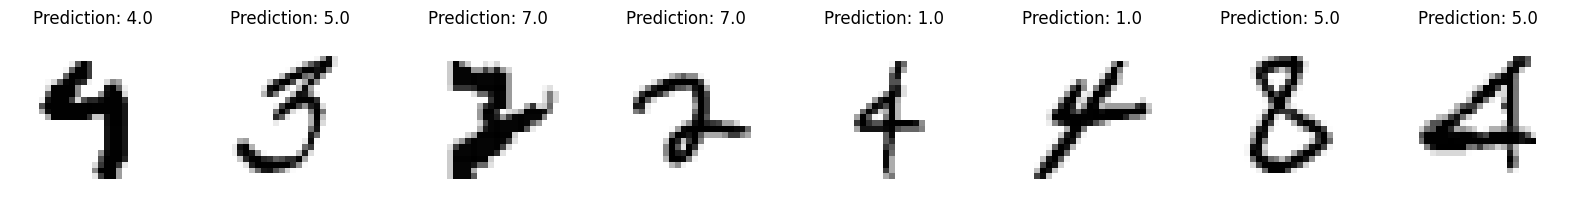

In [111]:
NUM_OF_IMAGES = 8 # number of images to display
_, axes = plt.subplots(nrows=1, ncols=NUM_OF_IMAGES, figsize=(20, 20))
START = 0 # start index of the images to display
for ax, ind in zip(axes, list(range(START,START+NUM_OF_IMAGES))):
    ax.set_axis_off()
    image = X_test[incorrect[ind]].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {Y_pred[incorrect[ind]]}")

### Correct Digits

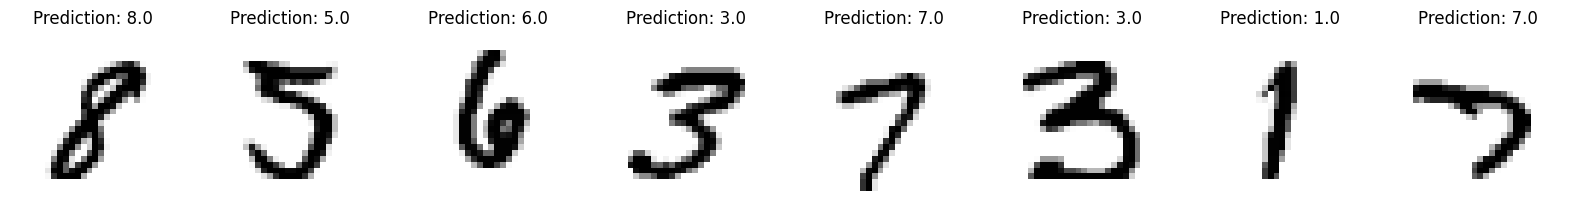

In [112]:
_, axes = plt.subplots(nrows=1, ncols=NUM_OF_IMAGES, figsize=(20, 20))
START = 120 # start index of the images to display
for ax, ind in zip(axes, list(range(START,START+NUM_OF_IMAGES))):
    ax.set_axis_off()
    image = X_test[correct[ind]].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {Y_pred[correct[ind]]}")

## Testing different k values with our own KNN
We will be trying different k values and see how the accuracy changes.
The values `k` would be [2, 5, 9, 11, 15]


Train Accuracy:  [1.0, 0.9445, 0.9245, 0.9195, 0.9075]
Test Accuracy:  [0.912, 0.914, 0.902, 0.9, 0.892]


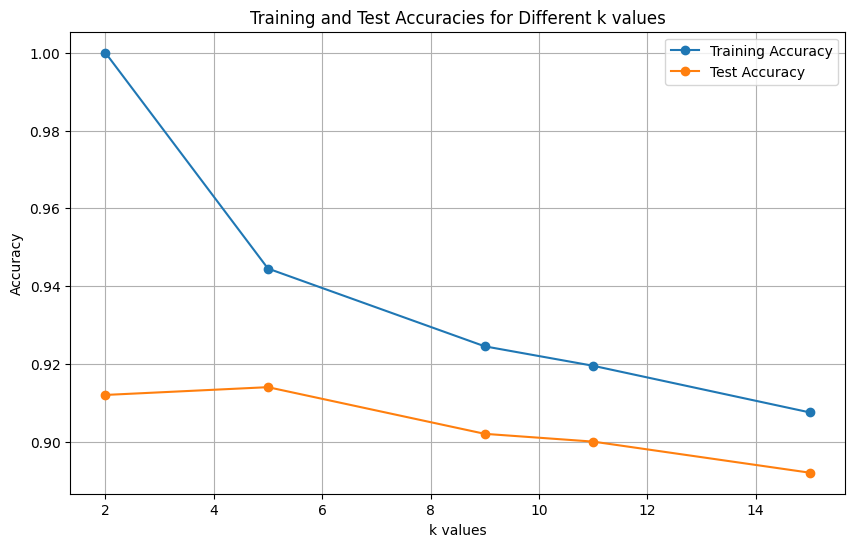

In [113]:
k_values = [2,5,9,11,15]
trainAccur = []
testAccur = []

for k in k_values:
    myKnn = knn(k)
    myKnn.fit(X_train, Y_train)

    y_train_pred = myKnn.predict(X_train)
    train_accuracy = myKnn.getAccuracy(Y_train, y_train_pred)
    trainAccur.append(train_accuracy)

    y_test_pred = myKnn.predict(X_test)
    test_accuracy = myKnn.getAccuracy(Y_test, y_test_pred)
    testAccur.append(test_accuracy)

print("Train Accuracy: ",trainAccur)
print("Test Accuracy: ",testAccur)

plt.figure(figsize=(10, 6))
plt.plot(k_values, trainAccur, marker='o', label='Training Accuracy')
plt.plot(k_values, testAccur, marker='o', label='Test Accuracy')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies for Different k values')
plt.legend()
plt.grid(True)
plt.show()

## Custom k-Nearest Neighbors (KNN) with Cosine Distance

This class `newKNN` extends the original `knn` class and modifies the distance metric used to compute the distance between vectors. Instead of the Euclidean (L2) distance, this implementation uses **Cosine Distance**.

Cosine Distance formula:
$$
\text{cosine\_distance}(\mathbf{x_1}, \mathbf{x_2}) = 1 - \frac{\mathbf{x_1} \cdot \mathbf{x_2}}{\|\mathbf{x_1}\|_2 \|\mathbf{x_2}\|_2}
$$

Where $\mathbf{x_1} \cdot \mathbf{x_2} = \sum_{i=1}^n x_{1i} x_{2i}$ is the dot product of the vectors $\mathbf{x_1}$ and $\mathbf{x_2}$, and $\|\mathbf{x_1}\|_2$ and $\|\mathbf{x_2}\|_2$ are their Euclidean norms.


### Overview

- **Cosine Similarity** is a measure of similarity between two vectors, calculated by the cosine of the angle between them.
- **Cosine Distance** is defined as `1 - cosine_similarity`, where a lower value indicates higher similarity.

This approach can be especially useful for text classification and other high-dimensional, sparse datasets where the magnitude of the vectors is less important than the angle between them.

### Key Modifications

- The `distance` method has been overridden to use **Cosine Distance** instead of the default Euclidean distance.

### Class `newKNN`

#### Method: `distance(self, vec1, vec2)`
- **Parameters:**
  - `vec1` (`np.ndarray`): The first input vector.
  - `vec2` (`np.ndarray`): The second input vector.
- **Returns:**
  - `float`: The cosine distance between the two input vectors.

The method calculates the **dot product** between the two vectors and their **norms**, then computes the **cosine similarity**. The **cosine distance** is the inverse of cosine similarity, which ranges from 0 (perfect similarity) to 2 (completely opposite vectors).

In [114]:
class newKNN(knn):
    def distance(self, vec1, vec2):
        # Calculate the dot product of the two vectors
        dot_product = np.dot(vec1, vec2)
        
        # Calculate the norms of the vectors
        norm_vec1 = np.linalg.norm(vec1)
        norm_vec2 = np.linalg.norm(vec2)
        
        # Calculate the cosine similarity
        cosine_similarity = dot_product / (norm_vec1 * norm_vec2)
        
        # Calculate the cosine distance
        cosine_distance = 1 - cosine_similarity
        
        return cosine_distance

myKnn = newKNN(k=4)
myKnn.fit(X_train, Y_train)

y_train_pred = myKnn.predict(X_train)
train_accuracy = myKnn.getAccuracy(Y_train, y_train_pred)


y_test_pred = myKnn.predict(X_test)
test_accuracy = myKnn.getAccuracy(Y_test, y_test_pred)

print("train accuracy: {}\ntest accuracy: {}".format(train_accuracy, test_accuracy))


train accuracy: 0.9615
test accuracy: 0.922


## Using a Different Dataset

In this example, we are using the **Wine Dataset**, which contains various attributes of different wines. The dataset includes the following features:

- **alcohol**
- **malic_acid**
- **ash**
- **alcalinity_of_ash**
- **magnesium**
- **total_phenols**
- **flavanoids**
- **nonflavanoid_phenols**
- **proanthocyanins**
- **color_intensity**
- **hue**
- **od280/od315_of_diluted_wines**
- **proline**

These attributes provide detailed information about the chemical composition and characteristics of the wines, which can be used for analysis and classification tasks.


In [115]:
wine = load_wine()
X = wine.data
print(X.shape)
Y = wine.target
print(Y.shape)
print("feature names:", wine.feature_names)
print("target names:", wine.target_names)

(178, 13)
(178,)
feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
target names: ['class_0' 'class_1' 'class_2']


## Classifying the Wine Dataset with KNN

In this section, we will classify the Wine dataset using our KNN model, with the **L2 norm** (Euclidean distance) as the distance metric. The goal is to select the optimal value of **k** for the task and document the approach used to determine it.

To evaluate the model, we will utilize the **KFold** cross-validation tool from Scikit-learn. This will allow us to assess the performance of the model by splitting the dataset into multiple folds and testing on different subsets of the data.

### Steps:
1. Choose the optimal value for **k**.
2. Apply **KFold cross-validation** to assess model performance.
3. Record the approach and results.


In [130]:
kf = KFold(n_splits=5, shuffle=True)
k_values = range(1, 21)
accur_averages = []
for k in k_values:
    accuracies = []
    myKnn = knn(k)
    for train_index, test_index in kf.split(X):
        trainX, testX = X[train_index], X[test_index]
        trainY, testY = Y[train_index], Y[test_index]
        myKnn.fit(trainX, trainY)

        yPred = myKnn.predict(testX)
        accuracy = accuracy_score(testY, yPred)
        accuracies.append(accuracy)

    avgAccuracy = np.mean(accuracies)
    accur_averages.append(avgAccuracy)

# Find the optimal k value
optimal_k = k_values[np.argmax(accur_averages)]
print(f'Optimal k value: {optimal_k}')

Optimal k value: 2


## Trying Cosine Distance with our Wine Dataset
We will be using the **Cosine Distance** as the distance metric for our KNN model as mentioned above. 

In [117]:
class newKNN(knn):
    def distance(self, vec1, vec2):
        # Calculate the dot product of the two vectors
        dot_product = np.dot(vec1, vec2)
        
        # Calculate the norms of the vectors
        norm_vec1 = np.linalg.norm(vec1)
        norm_vec2 = np.linalg.norm(vec2)
        
        # Calculate the cosine similarity
        cosine_similarity = dot_product / (norm_vec1 * norm_vec2)
        
        # Calculate the cosine distance
        cosine_distance = 1 - cosine_similarity
        
        return cosine_distance

kf = KFold(n_splits=5, shuffle=True)
myKNN = newKNN(k=2) # using optimal k value
myKnn.fit(X, Y)
avg_accuracy = []
for train_index, test_index in kf.split(X):
    trainX, testX = X[train_index], X[test_index]
    trainY, testY = Y[train_index], Y[test_index]
    myKnn.fit(trainX, trainY)

    yPred = myKnn.predict(testX)
    accuracy = accuracy_score(testY, yPred)
    accuracies.append(accuracy)
    avgAccuracy = np.mean(accuracies)
    avg_accuracy.append(avgAccuracy)

print(f'Average test accuracy: {avg_accuracy}')

Average test accuracy: [np.float64(0.7384920634920635), np.float64(0.708390022675737), np.float64(0.6927579365079365), np.float64(0.6951499118165785), np.float64(0.6999206349206349)]


## Normalizing the dataset before classificaiton 
We will be normalizing our X dataset before classifying it so we can improve the accuracy of our KNN model. We will be using this equation to normalize:

$$ x_{ij}^{normalized} = \frac{x_{ij} -\mu_{j}}{\sigma_{j}} $$
Where $x_{ij}$ is the value of feature j of sample i, 

$\mu_{j} $ and $\sigma_{j}$ are the mean and the standard deviation of feature j.

In [118]:
kf = KFold(n_splits=5, shuffle=True)
accuracies = []

# Normalize the dataset 
X_normalized = np.zeros_like(X, dtype=np.float64)
for j in range(X.shape[1]):  # Loop over each feature
    mean_j = np.mean(X[:, j])
    std_j = np.std(X[:, j])
    X_normalized[:, j] = (X[:, j] - mean_j) / std_j


myKNN = newKNN(k=2) #using k = 2 since its the "best"
avg_accuracy = []
for train_index, test_index in kf.split(X_normalized):
    trainX, testX = X_normalized[train_index], X_normalized[test_index]
    trainY, testY = Y[train_index], Y[test_index]
    myKnn.fit(trainX, trainY)

    yPred = myKnn.predict(testX)
    accuracy = accuracy_score(testY, yPred)
    accuracies.append(accuracy)
    avgAccuracy = np.mean(accuracies)
    avg_accuracy.append(avgAccuracy)


print(f'Average test accuracy after normalization: {avg_accuracy}')

Average test accuracy after normalization: [np.float64(0.9722222222222222), np.float64(0.9722222222222222), np.float64(0.9629629629629629), np.float64(0.9436507936507936), np.float64(0.954920634920635)]


## Conclusion

This project successfully demonstrated the implementation and evaluation of a digits classification system using the K-Nearest Neighbors (KNN) algorithm. By leveraging both Scikit-learn’s KNN implementation and a custom-built KNN model, the following insights were gained:

1. **Effectiveness of KNN**: 
   - Both Scikit-learn’s KNN and the custom implementation achieved high accuracy on the MNIST subset, with scores of 91.2% and 91.4%, respectively. These results underscore the algorithm's robustness in handling image classification tasks.

2. **Hyperparameter Optimization**:
   - The number of neighbors (`k`) significantly influenced model performance. Testing various `k` values revealed that lower values (e.g., `k=5`) balanced training and test accuracy, while larger `k` values tended to overfit the training data.

3. **Alternative Distance Metrics**:
   - Incorporating cosine distance in a modified KNN model resulted in comparable or improved accuracy, especially when dealing with normalized data. For example, using cosine distance achieved a test accuracy of 92.2% on the MNIST dataset.

4. **Normalization's Impact**:
   - Normalizing datasets before classification enhanced the accuracy of KNN models, as shown in experiments on the Wine dataset. Post-normalization, the average test accuracy improved from approximately 71% to 97%, demonstrating the importance of scaling features for distance-based algorithms like KNN.

5. **Visualization of Misclassifications**:
   - By analyzing misclassified digits, key challenges in the model’s performance were identified. This visualization technique provided insights into potential improvements, such as preprocessing strategies or integrating more advanced feature extraction methods.

6. **Cross-Dataset Application**:
   - The KNN algorithm was also applied to the Wine dataset, achieving high accuracy after tuning `k` and normalizing features. This demonstrated the model’s versatility across different types of data.

### Key Takeaways

- The simplicity and interpretability of KNN makes it a valuable tool for classification tasks, but its reliance on distance metrics necessitates careful consideration of feature scaling and metric selection.
- While computational efficiency can be a limitation for large datasets, optimization strategies such as reducing the dimensionality or using approximate nearest neighbor methods can alleviate these concerns.

This project highlights the practical strengths and limitations of KNN, providing a foundation for its application in image recognition and beyond. Future work could explore advanced KNN techniques, such as weighted voting or integration with other machine learning methods, to further improve performance and scalability.
